<a href="https://colab.research.google.com/github/tul17ii/NB-ANN-SVM.DT-ANN/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

naive bayes


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather_dataset.csv to weather_dataset.csv


Step 1: Loaded Data from CSV (All Rows)
  Outlook Temperature Humidity  Windy Play
   sunny         hot     high  False   NO
   sunny         hot     high   True   NO
overcast         hot     high  False  YES
   rainy        mild     high  False  YES
   rainy        cool   normal  False  YES
   rainy        cool   normal   True   NO
overcast        cool   normal   True  YES
   sunny        mild     high  False   NO
   sunny        cool   normal  False  YES
   rainy        mild   normal  False  YES
   sunny        mild   normal   True  YES
overcast        mild     high   True  YES
overcast         hot   normal  False  YES
   rainy        mild     high   True   NO

Step 2a: Handling Missing Values (Univariate)
Missing values before:
 Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64
Missing values after:
 Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

Step 2a: Bivariate Missing Value Check

/tmp/ipython-input-2-3635361582.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


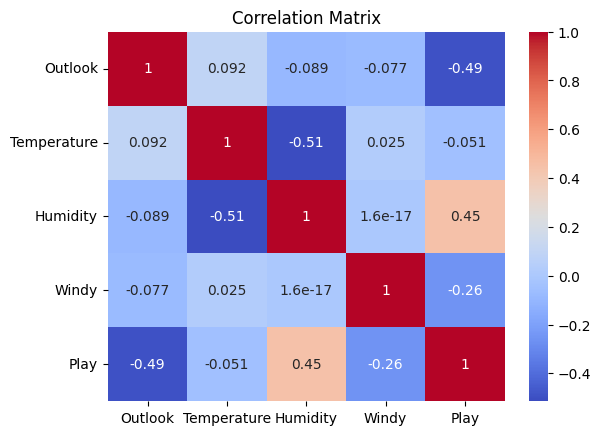


Step 4: Naive Bayes Classification

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

          NO       1.00      0.80      0.89         5
         YES       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



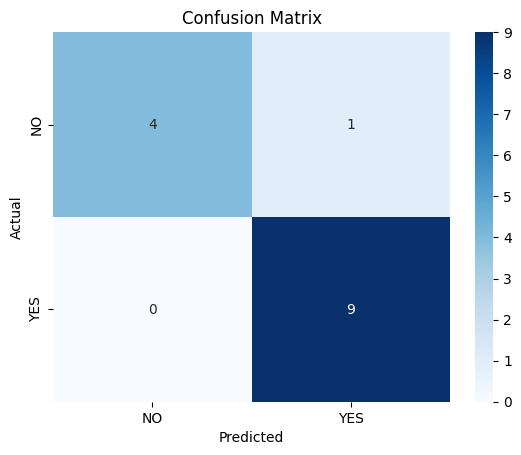


Final Result Table:

 Outlook Temperature Humidity  Windy Play Predicted_Play
   sunny         hot     high  False   NO             NO
   sunny         hot     high   True   NO             NO
overcast         hot     high  False  YES            YES
   rainy        mild     high  False  YES            YES
   rainy        cool   normal  False  YES            YES
   rainy        cool   normal   True   NO            YES
overcast        cool   normal   True  YES            YES
   sunny        mild     high  False   NO             NO
   sunny        cool   normal  False  YES            YES
   rainy        mild   normal  False  YES            YES
   sunny        mild   normal   True  YES            YES
overcast        mild     high   True  YES            YES
overcast         hot   normal  False  YES            YES
   rainy        mild     high   True   NO             NO


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Step 1: Load Data

df = pd.read_csv("weather_dataset.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))


# Step 2a: Handle Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(method='ffill', inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)

# Step 2a (Bivariate Check - Simulated on 'Humidity')
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
if df['Humidity'].isnull().sum() > 0:
    group_missing = df[df['Humidity'].isnull()].groupby(['Outlook', 'Temperature']).size().unstack(fill_value=0)
    print("Conditional missing count of 'Humidity':\n", group_missing)
else:
    print("No missing values in 'Humidity'")
# Step 2b: Outlier Detection (on numeric values)
from scipy.stats import zscore
print("\nStep 2b: Outlier Detection with Z-score")
df_encoded = df.copy()

# Encode categorical for Z-score
le_temp = LabelEncoder()
le_humid = LabelEncoder()
df_encoded['Temp_enc'] = le_temp.fit_transform(df_encoded['Temperature'])
df_encoded['Hum_enc'] = le_humid.fit_transform(df_encoded['Humidity'])

z_scores = np.abs(zscore(df_encoded[['Temp_enc', 'Hum_enc']]))
for i, col in enumerate(['Temp_enc', 'Hum_enc']):
    outliers = z_scores[:, i] > 3
    if outliers.any():
        print(f"Outliers in {col}: {np.where(outliers)[0].tolist()}")
        df_encoded.loc[outliers, col] = df_encoded[col].median()
    else:
        print(f"No outliers in {col}")
# Step 2c: Scaling and Normalization
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")

# Convert categorical features for modeling
df_model = df.copy()
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humid = LabelEncoder()
le_windy = LabelEncoder()
le_play = LabelEncoder()

df_model['Outlook'] = le_outlook.fit_transform(df_model['Outlook'])
df_model['Temperature'] = le_temp.fit_transform(df_model['Temperature'])
df_model['Humidity'] = le_humid.fit_transform(df_model['Humidity'])
df_model['Windy'] = le_windy.fit_transform(df_model['Windy'])
df_model['Play'] = le_play.fit_transform(df_model['Play'])

X = df_model[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df_model['Play']

# Scaling
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

minmax = MinMaxScaler()
X_mm = minmax.fit_transform(X)
pt = PowerTransformer()
X_pt = pt.fit_transform(X)

# Add back to DataFrame
df_scaled = pd.DataFrame(X, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])
df_scaled[['Outlook_std', 'Temp_std', 'Humid_std', 'Windy_std']] = X_std
df_scaled[['Outlook_mm', 'Temp_mm', 'Humid_mm', 'Windy_mm']] = X_mm
df_scaled[['Outlook_pt', 'Temp_pt', 'Humid_pt', 'Windy_pt']] = X_pt

print(df_scaled.head())
# Step 3: Correlation Matrix
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df_model.corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
# Step 4: Naive Bayes Classification
print("\nStep 4: Naive Bayes Classification")

model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=le_play.classes_))# Step 5: Confusion Matrix Plot
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_play.classes_, yticklabels=le_play.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()# Step 6: Final Result Table
result_df = df.copy()
result_df["Predicted_Play"] = le_play.inverse_transform(y_pred)

print("\nFinal Result Table:\n")
print(result_df[['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play', 'Predicted_Play']].to_string(index=False))

DT


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Transportation mode_DT.csv to Transportation mode_DT.csv


Step 1: Loaded Data from CSV (All Rows)
 Gender  Car ownership Travel cost Income level Transportation mode
  Male              0       cheap          Low                 Bus
  Male              1       cheap       Medium                 Bus
Female              1       cheap       Medium               Train
Female              0       cheap          Low                 Bus
  Male              1       cheap       Medium                 Bus
  Male              0    Standard       Medium               Train
Female              1    Standard       Medium               Train
Female              1   Expensive         High                 Car
  Male              2   Expensive       Medium                 Car
Female              2   Expensive         High                 Car
Female              2   Expensive         High                 Car
  Male              0    Standard       Medium               Train
  Male              0       cheap          Low                 Bus

Step 2a: Handling Mi

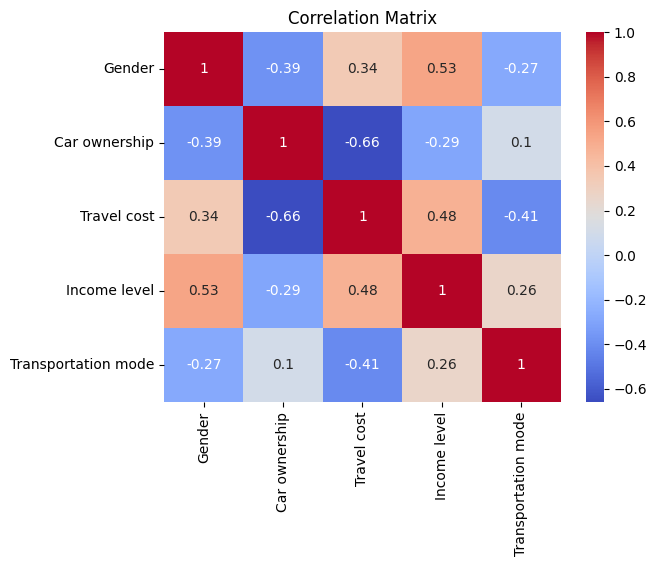


Step 4: Decision Tree Classification

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

         Bus       1.00      1.00      1.00         5
         Car       1.00      1.00      1.00         4
       Train       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



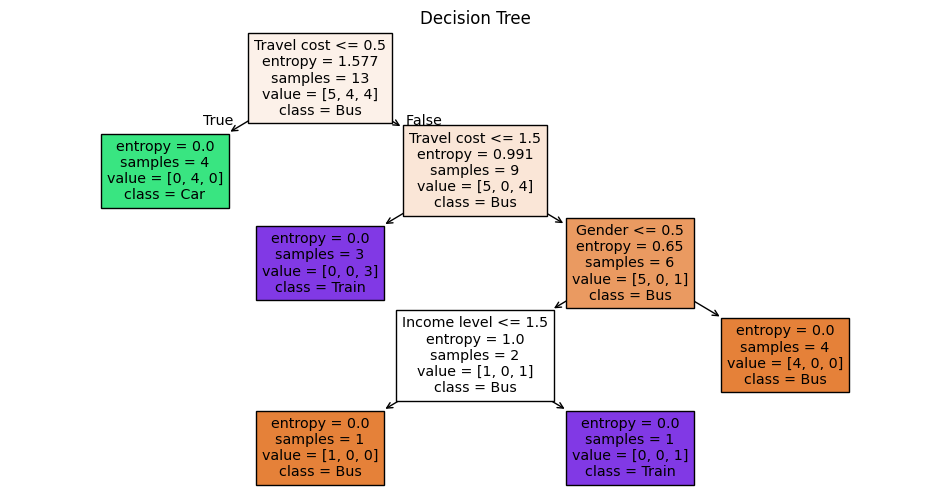

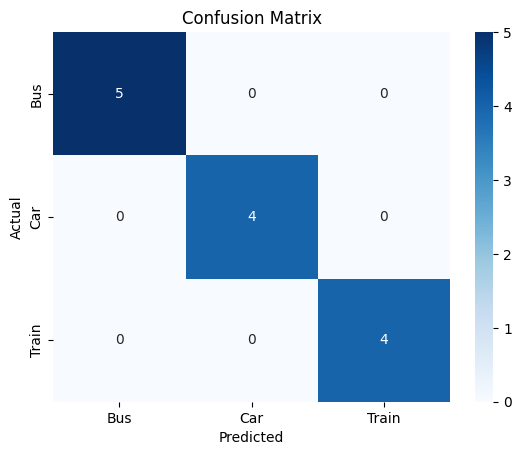


Final Result Table:

Gender  Car ownership Travel cost Income level Transportation mode Predicted
  Male              0       cheap          Low                 Bus       Bus
  Male              1       cheap       Medium                 Bus       Bus
Female              1       cheap       Medium               Train     Train
Female              0       cheap          Low                 Bus       Bus
  Male              1       cheap       Medium                 Bus       Bus
  Male              0    Standard       Medium               Train     Train
Female              1    Standard       Medium               Train     Train
Female              1   Expensive         High                 Car       Car
  Male              2   Expensive       Medium                 Car       Car
Female              2   Expensive         High                 Car       Car
Female              2   Expensive         High                 Car       Car
  Male              0    Standard       Medium        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore

# Step 1: Load Dataset
df = pd.read_csv("Transportation mode_DT.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))

# Step 2a: Handle Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.ffill(inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)

# Step 2a (Bivariate Missing Check - Simulated on first column with nulls if any)
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Missing values in {col} grouped by target:\n", df[df[col].isnull()].groupby(df.columns[-1]).size())
        break
else:
    print("No missing values found.")

# Step 2b: Outlier Detection with Z-score (numeric only)
print("\nStep 2b: Outlier Detection with Z-score")
df_numeric = df.select_dtypes(include=[np.number])
if not df_numeric.empty:
    z_scores = np.abs(zscore(df_numeric))
    for i, col in enumerate(df_numeric.columns):
        outliers = z_scores[:, i] > 3
        if outliers.any():
            print(f"Outliers in {col}: {np.where(outliers)[0].tolist()}")
            df.loc[outliers, col] = df[col].median()
        else:
            print(f"No outliers in {col}")
else:
    print("No numeric columns found for Z-score detection.")

# Step 2c: Scaling and Normalization
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")

df_encoded = df.copy()
label_encoders = {}

# Encode all object (categorical) columns
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.iloc[:, :-1]  # All columns except the last one (assumed target)
y = df_encoded.iloc[:, -1]   # Last column as target

# Scaling
X_std = StandardScaler().fit_transform(X)
X_mm = MinMaxScaler().fit_transform(X)
X_pt = PowerTransformer().fit_transform(X)

# Step 3: Correlation Matrix
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df_encoded.corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Step 4: Decision Tree Classification
print("\nStep 4: Decision Tree Classification")
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
target_name = label_encoders[df.columns[-1]].classes_ if df[df.columns[-1]].dtype == 'object' else None
print(classification_report(y, y_pred, target_names=target_name))

# Plot Tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns if isinstance(X, pd.DataFrame) else df_encoded.columns[:-1],
          class_names=target_name, filled=True)
plt.title("Decision Tree")
plt.show()

# Step 5: Confusion Matrix Plot
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 6: Final Result Table
df_result = df.copy()
if target_name is not None:
    df_result["Predicted"] = label_encoders[df.columns[-1]].inverse_transform(y_pred)
else:
    df_result["Predicted"] = y_pred

print("\nFinal Result Table:\n")
print(df_result.to_string(index=False))

non linear SVM


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving non_linear_svm_dataset.csv to non_linear_svm_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from google.colab import files
files.upload()
# Load uploaded CSV dataset
df = pd.read_csv("non_linear_svm_dataset.csv")

# Step 2a: Handling Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)

# Step 2a: Handling Missing Values (Bivariate)
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
group_missing = df[df['x2'].isnull()].groupby(['x1', 'label']).size().unstack(fill_value=0)
print("Conditional missing count of 'x2':")
print(group_missing)

# Step 2b: Outlier Detection and Handling (Univariate Z-Score)
print("\nStep 2b: Outlier Detection with Z-score (Univariate)")
columns_to_check = ['x1', 'x2', 'label']
z_scores_np = np.abs(zscore(df[columns_to_check]))

for i, col in enumerate(columns_to_check):
    outliers = z_scores_np[:, i] > 3
    if outliers.any():
        print(f"Outliers detected in {col} at rows: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No significant outliers found in {col}.")

# Step 2c: Scaling, Normalization, and Transformation
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")

# StandardScaler
scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[columns_to_check])
df[['x1_std', 'x2_std', 'label_std']] = std_scaled

# MinMaxScaler
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df[columns_to_check])
df[['x1_mm', 'x2_mm', 'label_mm']] = mm_scaled

# PowerTransformer
pt = PowerTransformer()
pt_scaled = pt.fit_transform(df[columns_to_check])
df[['x1_pt', 'x2_pt', 'label_pt']] = pt_scaled

# Display transformed DataFrame summary
df_preview = df[['x1', 'x2', 'label',
                 'x1_std', 'x2_std', 'label_std',
                 'x1_mm', 'x2_mm', 'label_mm',
                 'x1_pt', 'x2_pt', 'label_pt']]

df_preview.head(10)

Saving non_linear_svm_dataset.csv to non_linear_svm_dataset (2).csv

Step 2a: Handling Missing Values (Univariate)
Missing values before:
 x1       0
x2       0
label    0
dtype: int64
Missing values after:
 x1       0
x2       0
label    0
dtype: int64

Step 2a: Bivariate Missing Value Check (Simulated)
Conditional missing count of 'x2':
Empty DataFrame
Columns: []
Index: []

Step 2b: Outlier Detection with Z-score (Univariate)
No significant outliers found in x1.
No significant outliers found in x2.
No significant outliers found in label.

Step 2c: StandardScaler, MinMaxScaler, PowerTransformer



,x1,x2,label,x1_std,x2_std,label_std,x1_mm,x2_mm,label_mm,x1_pt,x2_pt,label_pt
0,1,1,-1,0.816497,0.816497,-1.0,0.75,0.75,0.0,8.164966e-01,8.164966e-01,-1.0
1,-1,1,-1,-0.816497,0.816497,-1.0,0.25,0.75,0.0,-8.164966e-01,8.164966e-01,-1.0
2,-1,-1,-1,-0.816497,-0.816497,-1.0,0.25,0.25,0.0,-8.164966e-01,-8.164966e-01,-1.0
3,1,-1,-1,0.816497,-0.816497,-1.0,0.75,0.25,0.0,8.164966e-01,-8.164966e-01,-1.0
4,2,0,1,1.632993,0.000000,1.0,1.00,0.50,1.0,1.632993e+00,-1.956609e-09,1.0
5,0,2,1,0.000000,1.632993,1.0,0.50,1.00,1.0,-1.956609e-09,1.632993e+00,1.0
6,-2,0,1,-1.632993,0.000000,1.0,0.00,0.50,1.0,-1.632993e+00,-1.956609e-09,1.0
7,0,-2,1,0.000000,-1.632993,1.0,0.50,0.00,1.0,-1.956609e-09,-1.632993e+00,1.0


KNN


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving knn_example_dataset.csv to knn_example_dataset.csv


Saving knn_example_dataset.csv to knn_example_dataset (1).csv
Original Data:
  X1 (Durability)  X2 (Strength) Category (Y)
               7              7          Bad
               7              4          Bad
               3              4         Good
               1              4         Good

Step 2a: Handling Missing Values (Univariate)
Before:
 X1 (Durability)    0
X2 (Strength)      0
Category (Y)       0
dtype: int64
After:
 X1 (Durability)    0
X2 (Strength)      0
Category (Y)       0
dtype: int64

Simulated Bivariate Missing Check on 'Category (Y)'
Empty DataFrame
Columns: []
Index: []

Step 2b: Outlier Detection and Handling (Z-score)
No outliers in X1 (Durability)
No outliers in X2 (Strength)

Step 2c: Feature Scaling and Transformation
   X1 (Durability)  X2 (Strength)    X1_std    X2_std
0                7              7  0.962250  1.732051
1                7              4  0.962250 -0.577350
2                3              4 -0.577350 -0.577350
3                1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


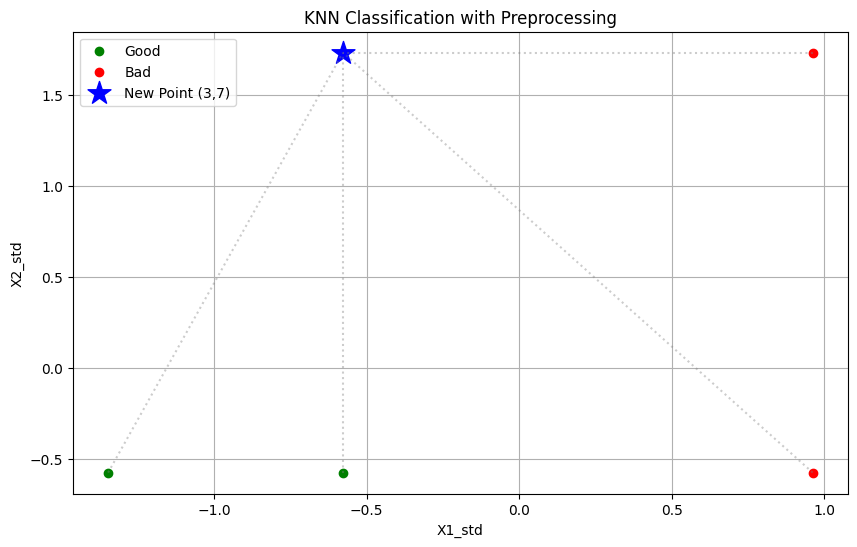

In [ ]:
# STEP 0: Upload and import libraries
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import zscore

# STEP 1: Load dataset
filename = next(iter(uploaded))
df = pd.read_csv(filename)
print("Original Data:\n", df.to_string(index=False))

# STEP 2a: Handle Missing Values
print("\nStep 2a: Handling Missing Values (Univariate)")
print("Before:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
print("After:\n", df.isnull().sum())

# Simulated bivariate missing analysis (based on 'Category (Y)')
if 'Category (Y)' in df.columns:
    print("\nSimulated Bivariate Missing Check on 'Category (Y)'")
    group_missing = df[df['Category (Y)'].isnull()].groupby(['X1 (Durability)', 'X2 (Strength)']).size().unstack(fill_value=0)
    print(group_missing)

# STEP 2b: Outlier detection using Z-score
print("\nStep 2b: Outlier Detection and Handling (Z-score)")
num_cols = ['X1 (Durability)', 'X2 (Strength)']
z_scores = np.abs(zscore(df[num_cols]))
for i, col in enumerate(num_cols):
    outliers = z_scores[:, i] > 3
    if outliers.any():
        print(f"Outliers in {col}: Rows {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No outliers in {col}")

# STEP 2c: Scaling & Transformation
print("\nStep 2c: Feature Scaling and Transformation")

# StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df[num_cols])
df[['X1_std', 'X2_std']] = df_std

# MinMaxScaler (Optional, not used for KNN here)
minmax = MinMaxScaler()
df_mm = minmax.fit_transform(df[num_cols])
df[['X1_mm', 'X2_mm']] = df_mm

# PowerTransformer (Optional, not used for KNN here)
pt = PowerTransformer()
df_pt = pt.fit_transform(df[num_cols])
df[['X1_pt', 'X2_pt']] = df_pt

print(df[['X1 (Durability)', 'X2 (Strength)', 'X1_std', 'X2_std']])

# STEP 3: KNN Classification (on standardized data)
X = df[['X1_std', 'X2_std']].values
y = df['Category (Y)'].values

# Test point (3,7) needs to be standardized using same scaler
new_point_raw = np.array([[3, 7]])
new_point_scaled = scaler.transform(new_point_raw)[0]

k = 3
print(f"\nKNN Classification for (3,7) with k={k}")

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

distances = []
for i in range(len(X)):
    dist = euclidean_distance(new_point_scaled, X[i])
    distances.append((dist, y[i]))
    print(f"Distance to point {X[i]} ({y[i]}): {dist:.2f}")

# Nearest neighbors
distances.sort()
neighbors = distances[:k]
print(f"\nTop {k} Neighbors:")
for i, (dist, label) in enumerate(neighbors, 1):
    print(f"{i}. Distance: {dist:.2f}, Label: {label}")

# Majority vote
votes = [label for (_, label) in neighbors]
prediction = Counter(votes).most_common(1)[0][0]
print("\nVotes:", votes)
print(f"Final Prediction: '{prediction}'")

# STEP 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[y=='Good', 0], X[y=='Good', 1], color='green', label='Good')
plt.scatter(X[y=='Bad', 0], X[y=='Bad', 1], color='red', label='Bad')
plt.scatter(new_point_scaled[0], new_point_scaled[1], color='blue', marker='*', s=300, label='New Point (3,7)')

# Optional: draw dotted lines
for x in X:
    plt.plot([x[0], new_point_scaled[0]], [x[1], new_point_scaled[1]], 'gray', linestyle=':', alpha=0.4)

plt.title('KNN Classification with Preprocessing')
plt.xlabel('X1_std')
plt.ylabel('X2_std')
plt.legend()
plt.grid(True)
plt.show()

Linear SVM


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lsvm.csv to Lsvm.csv


Step 1: Loaded Data from CSV (All Rows)
  x1  x2  label
  2   1     -1
  2  -1     -1
  4   0      1

Step 2a: Handling Missing Values (Univariate)
Missing values before:
 x1       0
x2       0
label    0
dtype: int64
Missing values after:
 x1       0
x2       0
label    0
dtype: int64

Step 2c: StandardScaler, MinMaxScaler, PowerTransformer

 x1  x2  label    x1_std    x2_std  label_std  x1_mm  x2_mm  label_mm     x1_pt         x2_pt  label_pt
  2   1     -1 -0.707107  1.224745  -0.707107    0.0    1.0       0.0 -0.707107  1.224745e+00 -0.707107
  2  -1     -1 -0.707107 -1.224745  -0.707107    0.0    0.0       0.0 -0.707107 -1.224745e+00 -0.707107
  4   0      1  1.414214  0.000000   1.414214    1.0    0.5       1.0  1.414214 -4.533482e-09  1.414214

Step 3: Bivariate Correlation Matrix
        x1   x2  label
x1     1.0  0.0    1.0
x2     0.0  1.0    0.0
label  1.0  0.0    1.0
Augmented Support Vectors with Labels:
Vector S1: [2, 1, 1], Label: -1
Vector S2: [2, -1, 1], Label: -1
Vecto

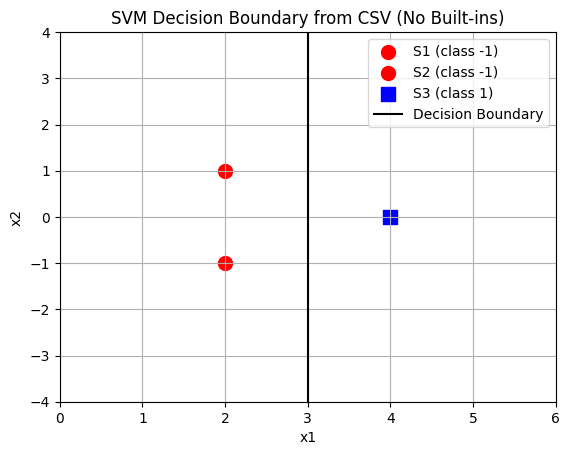

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import zscore
from google.colab import files


# Upload CSV
df = pd.read_csv("Lsvm.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))




# Handling Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)


# Re-fill again just in case
df.fillna(df.mean(numeric_only=True), inplace=True)


# Use correct column names
columns_to_check = ['x1', 'x2', 'label']
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(numeric_only=True), inplace=True)


# Compute Z-scores and replace outliers
z_scores_np = np.abs(zscore(df[columns_to_check]))
for i, col in enumerate(columns_to_check):
    outliers = z_scores_np[:, i] > 3
    df.loc[outliers, col] = df[col].median()


# Scaling, Normalization, and Transformation
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")


# StandardScaler
scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[columns_to_check])
df[['x1_std', 'x2_std', 'label_std']] = std_scaled


# MinMaxScaler
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df[columns_to_check])
df[['x1_mm', 'x2_mm', 'label_mm']] = mm_scaled


# PowerTransformer
pt = PowerTransformer()
pt_scaled = pt.fit_transform(df[columns_to_check])
df[['x1_pt', 'x2_pt', 'label_pt']] = pt_scaled


# Print the transformed values
print(df[['x1', 'x2', 'label',
          'x1_std', 'x2_std', 'label_std',
          'x1_mm', 'x2_mm', 'label_mm',
          'x1_pt', 'x2_pt', 'label_pt']].to_string(index=False))


# Correlation Matrix (Bivariate Analysis)
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df[columns_to_check].corr()
print(correlation)


# ----------------------------- SVM From Lsvm.csv -----------------------------
vectors = []
labels = []


with open('Lsvm.csv', 'r') as f:
    next(f)  # skip header
    for line in f:
        x1, x2, label = line.strip().split(',')
        vectors.append([int(x1), int(x2), 1])  # Augment with bias term
        labels.append(int(label))


# Display
print("Augmented Support Vectors with Labels:")
for i in range(len(vectors)):
    print(f"Vector S{i+1}: {vectors[i]}, Label: {labels[i]}")


# Manual dot product
def dot(v1, v2):
    return sum(a * b for a, b in zip(v1, v2))


# Build A (3x3 matrix) and y
A = []
for i in range(3):
    row = []
    for j in range(3):
        row.append(dot(vectors[j], vectors[i]))
    A.append(row)


y = labels


# Show matrix A and vector y
print("\nCoefficient Matrix A:")
for row in A:
    print(row)


print("\nRHS vector y:", y)


# Unpack for readability
a11, a12, a13 = A[0]
a21, a22, a23 = A[1]
a31, a32, a33 = A[2]
y1, y2, y3 = y


# Step 1: Eliminate alpha3 from Eq1 and Eq2
p = a11 - a21
q = a12 - a22
r = y1 - y2


def alpha1_of_alpha2(alpha2):
    return (r - q * alpha2) / p


def solve_alphas():
    for i in range(-1000, 1000):
        a2 = i / 20.0
        try:
            a1 = alpha1_of_alpha2(a2)
        except ZeroDivisionError:
            continue


        lhs = a11 * a1 + a12 * a2
        rem = y1 - lhs
        try:
            a3 = rem / a13
        except ZeroDivisionError:
            continue


        check = a31 * a1 + a32 * a2 + a33 * a3
        if abs(check - y3) < 1e-3:
            return a1, a2, a3


    return None, None, None


alpha1, alpha2, alpha3 = solve_alphas()


print(f"\nSolved α values (manually):")
print(f"α1 = {alpha1}")
print(f"α2 = {alpha2}")
print(f"α3 = {alpha3}")


# Compute final hyperplane
w_tilde = [0, 0, 0]
for i in range(3):
    for j in range(3):
        w_tilde[j] += [alpha1, alpha2, alpha3][i] * vectors[i][j]


w = w_tilde[:2]
b = w_tilde[2]


print("\nFinal hyperplane vector:")
print(f"w = {w}")
print(f"b = {b}")
print(f"Decision boundary: {w[0]}*x1 + {w[1]}*x2 + {b} = 0")


# Plot SVM decision boundary
x_vals = [vec[0] for vec in vectors]
y_vals = [vec[1] for vec in vectors]


colors = ['red' if lbl == -1 else 'blue' for lbl in labels]
markers = ['o' if lbl == -1 else 's' for lbl in labels]


for i in range(len(vectors)):
    plt.scatter(x_vals[i], y_vals[i], c=colors[i], s=100, marker=markers[i],
                label=f'S{i+1} (class {labels[i]})')


x_range = np.linspace(min(x_vals)-1, max(x_vals)+1, 300)
if w[1] != 0:
    y_boundary = -(w[0]*x_range + b) / w[1]
    margin = 1 / np.linalg.norm(w)
    y_margin_up = y_boundary + margin
    y_margin_down = y_boundary - margin


    plt.plot(x_range, y_boundary, 'k-', label='Decision Boundary')
    plt.plot(x_range, y_margin_up, 'k--', linewidth=0.8, label='Margin (+1)')
    plt.plot(x_range, y_margin_down, 'k--', linewidth=0.8, label='Margin (-1)')
else:
    x_line = -b / w[0]
    plt.axvline(x=x_line, color='k', label='Decision Boundary')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary from CSV (No Built-ins)')
plt.grid(True)
plt.legend()
plt.xlim(min(x_vals)-2, max(x_vals)+2)
plt.ylim(min(y_vals)-3, max(y_vals)+3)
plt.show()

ANN
**bold text**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving supervised_learning_table17_1.csv to supervised_learning_table17_1.csv


Step 1: Loaded Data from CSV (All Rows)
  Step  X1  X2  Z  W1_init  W2_init  Y  Delta  W1_final  W2_final
    1   0   0  0      0.1      0.3  0    0.0       0.1       0.3
    1   0   1  1      0.1      0.3  0    1.0       0.1       0.5
    1   1   0  1      0.1      0.5  0    1.0       0.3       0.5
    1   1   1  1      0.3      0.5  1    0.0       0.3       0.5
    2   0   0  0      0.3      0.5  0    0.0       0.3       0.5
    2   0   1  1      0.3      0.5  0    1.0       0.3       0.7
    2   1   0  1      0.3      0.7  0    1.0       0.5       0.7
    2   1   1  1      0.5      0.7  1    0.0       0.5       0.7
    3   0   0  0      0.5      0.7  0    0.0       0.5       0.7
    3   0   1  1      0.5      0.7  0    0.0       0.5       0.7
    3   1   0  1      0.5      0.7  0    1.0       0.7       0.7
    3   1   1  1      0.7      0.7  1    0.0       0.7       0.7
    4   0   0  0      0.7      0.7  0    0.0       0.7       0.7
    4   0   1  1      0.7      0.7  0    0.0     

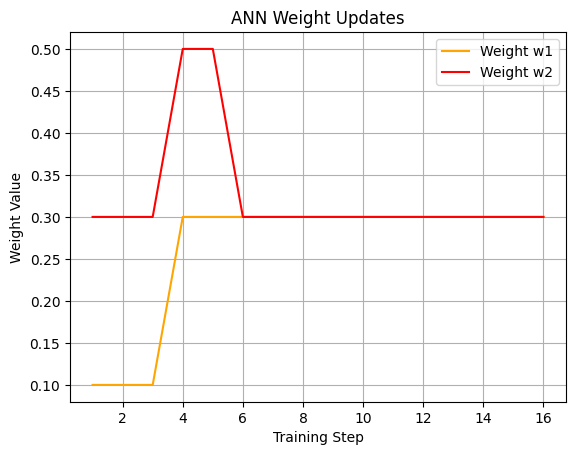


Final Result Table:

 Step  Predicted Y  Actual Y  Final w1  Final w2
    1            0         0       0.1       0.3
    2            0         0       0.1       0.3
    3            0         0       0.1       0.3
    4            0         1       0.3       0.5
    5            0         0       0.3       0.5
    6            1         0       0.3       0.3
    7            0         0       0.3       0.3
    8            1         1       0.3       0.3
    9            0         0       0.3       0.3
   10            0         0       0.3       0.3
   11            0         0       0.3       0.3
   12            1         1       0.3       0.3
   13            0         0       0.3       0.3
   14            0         0       0.3       0.3
   15            0         0       0.3       0.3
   16            1         1       0.3       0.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import zscore


# Step 1: Load CSV Data
df = pd.read_csv("supervised_learning_table17_1.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))


# Step 2a: Handling Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)


# Step 2a: Handling Missing Values (Bivariate)
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
group_missing = df[df['Z'].isnull()].groupby(['X1', 'X2']).size().unstack(fill_value=0)
print("Conditional missing count of 'Z':")
print(group_missing)


# Step 2b: Outlier Detection and Handling (Univariate Z-Score)
print("\nStep 2b: Outlier Detection with Z-score (Univariate)")
columns_to_check = ['X1', 'X2', 'Z']
z_scores_np = np.abs(zscore(df[columns_to_check]))


for i, col in enumerate(columns_to_check):
    outliers = z_scores_np[:, i] > 3
    if outliers.any():
        print(f"Outliers detected in {col} at rows: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No significant outliers found in {col}.")


# Step 2c: Scaling, Normalization, and Transformation
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")


# StandardScaler
scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[columns_to_check])
df[['X1_std', 'X2_std', 'Z_std']] = std_scaled


# MinMaxScaler
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df[columns_to_check])
df[['X1_mm', 'X2_mm', 'Z_mm']] = mm_scaled


# PowerTransformer
pt = PowerTransformer()
pt_scaled = pt.fit_transform(df[columns_to_check])
df[['X1_pt', 'X2_pt', 'Z_pt']] = pt_scaled


print(df[['X1', 'X2', 'Z',
          'X1_std', 'X2_std', 'Z_std',
          'X1_mm', 'X2_mm', 'Z_mm',
          'X1_pt', 'X2_pt', 'Z_pt']].to_string(index=False))


# Step 3: Correlation Matrix (Bivariate Analysis)
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df[columns_to_check].corr()
print(correlation)


# Step 4: ANN Logic (Step-by-Step Perceptron)
print("\nStep 4: ANN Step-by-Step Updates\n")
alpha = 0.2
threshold = 0.5
w1, w2 = 0.1, 0.3


steps, outputs, weights_w1, weights_w2 = [], [], [], []


for i in range(len(df)):
    x1 = df.loc[i, 'X1']
    x2 = df.loc[i, 'X2']
    y = df.loc[i, 'Y']


    net = x1 * w1 + x2 * w2
    y_pred = 1 if net >= threshold else 0
    error = y - y_pred


    print(f"Step {i+1}: x1={x1}, x2={x2}, y={y}, net={net:.2f}, pred={y_pred}, error={error}")
    print(f"  Before update: w1={w1:.2f}, w2={w2:.2f}")

    w1 = w1 + alpha * error * x1
    w2 = w2 + alpha * error * x2

    print(f"  After update:  w1={w1:.2f}, w2={w2:.2f}\n")


    steps.append(i + 1)
    outputs.append(y_pred)
    weights_w1.append(round(w1, 2))
    weights_w2.append(round(w2, 2))


# Step 5: Plot weight updates
plt.plot(steps, weights_w1, label='Weight w1', color='orange')
plt.plot(steps, weights_w2, label='Weight w2', color='red')
plt.xlabel("Training Step")
plt.ylabel("Weight Value")
plt.title("ANN Weight Updates")
plt.legend()
plt.grid(True)
plt.show()


# Step 6: Final Result Table
result_df = pd.DataFrame({
    "Step": steps,
    "Predicted Y": outputs,
    "Actual Y": df['Y'],
    "Final w1": weights_w1,
    "Final w2": weights_w2
})


print("\nFinal Result Table:\n")
print(result_df.to_string(index=False))